# Stock-out Prediction (Inventory Analytics) including MVE and Feature Selecton

The project is about the stock-out prediction of a company which deals with the inventory analytics which is a part of supply chain analytics. The data is from a delivery company like amazon and walmart. It contains the shipping details, customer addresses,product details, sales details i.e the sales figure,quantity order,discounts and profit made. Most important data we have is the inventory data or the stock data i.e after ordering whether the product is available or not. In this project we will perform the missing value estimation using cenral tendency, feature selection using pearson correlation and finally predict whether the stock is available or not.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
sales_data=pd.read_excel('C:/Users/user/Desktop/DATA/Trader Stores.xlsx')
sales_data.head(3)

,Order ID,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Available
0,CA-23-5256,Second Class,CG-252,Claire Gute,Consumer,United States,Henderson,Kentucky,4242,South,FUR-BO-798,Furniture,Bookcases,Bush Somerset Collection Bookcase,26.96,2.0,NaN,4.936,True
1,CA-23-5256,Second Class,CG-252,Claire Gute,Consumer,United States,Henderson,Kentucky,4242,South,FUR-CH-454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",73.94,3.0,NaN,29.582,True
2,CA-23-38688,Second Class,DV-345,Darrin Van Huff,Corporate,United States,Los Angeles,California,936,West,OFF-LA-24,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,4.62,2.0,NaN,6.874,True


In [3]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9994 non-null   object 
 1   Ship Mode      9994 non-null   object 
 2   Customer ID    9994 non-null   object 
 3   Customer Name  9994 non-null   object 
 4   Segment        9994 non-null   object 
 5   Country        9994 non-null   object 
 6   City           9994 non-null   object 
 7   State          9994 non-null   object 
 8   Postal Code    9994 non-null   int64  
 9   Region         9994 non-null   object 
 10  Product ID     9994 non-null   object 
 11  Category       9994 non-null   object 
 12  Sub-Category   9994 non-null   object 
 13  Product Name   9994 non-null   object 
 14  Sales          9973 non-null   float64
 15  Quantity       9004 non-null   float64
 16  Discount       5195 non-null   float64
 17  Profit         9889 non-null   float64
 18  Availabl

In [4]:
sales_data.isnull().sum()

Order ID            0
Ship Mode           0
Customer ID         0
Customer Name       0
Segment             0
Country             0
City                0
State               0
Postal Code         0
Region              0
Product ID          0
Category            0
Sub-Category        0
Product Name        0
Sales              21
Quantity          990
Discount         4799
Profit            105
Available           0
dtype: int64

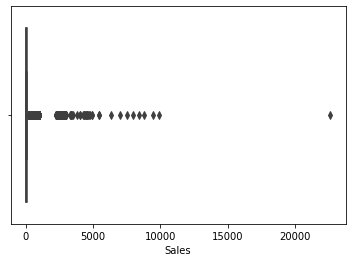

In [5]:
sns.boxplot(sales_data.Sales)

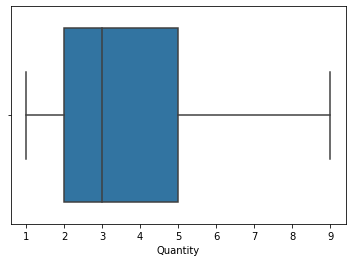

In [6]:
sns.boxplot(sales_data.Quantity)

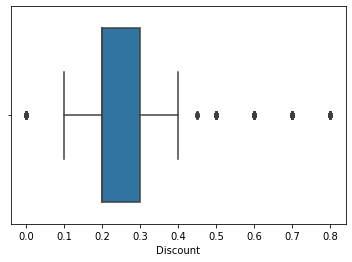

In [7]:
sns.boxplot(sales_data.Discount)

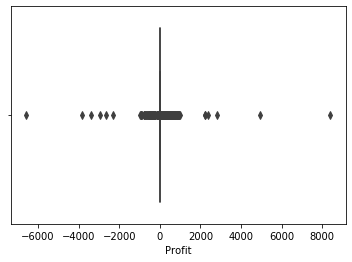

In [8]:
sns.boxplot(sales_data.Profit)

Missing value estimation using central tendency (Mean, median and mode). Plotting the boxplot to identify the outliers

In [9]:
df_mean=sales_data.fillna(sales_data.mean())

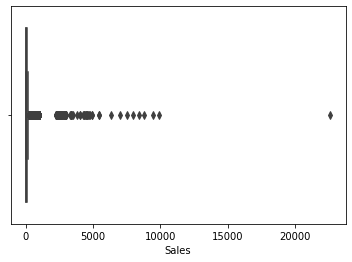

In [10]:
sns.boxplot(df_mean.Sales)

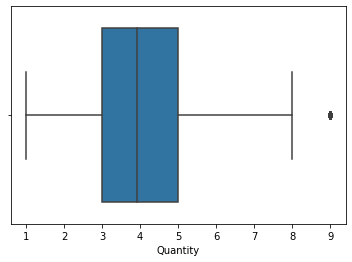

In [11]:
sns.boxplot(df_mean.Quantity)

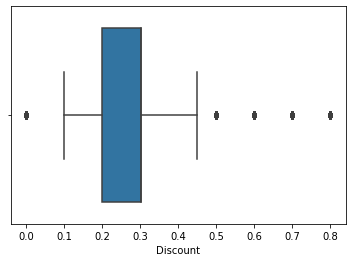

In [12]:
sns.boxplot(df_mean.Discount)

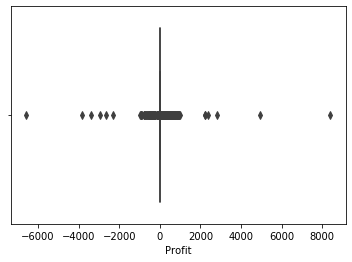

In [13]:
sns.boxplot(df_mean.Profit)

In [14]:
df_median=sales_data.fillna(sales_data.median())

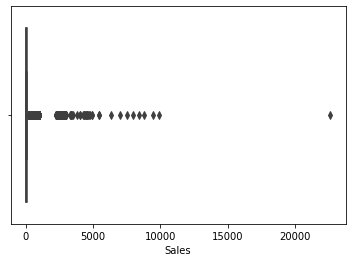

In [15]:
sns.boxplot(df_median.Sales)

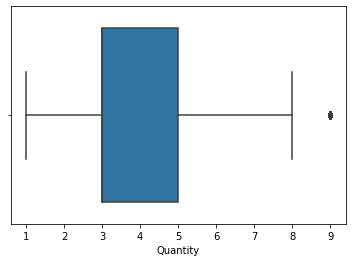

In [16]:
sns.boxplot(df_median.Quantity)

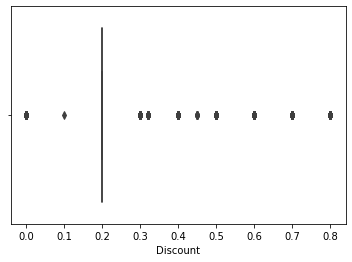

In [17]:
sns.boxplot(df_median.Discount)

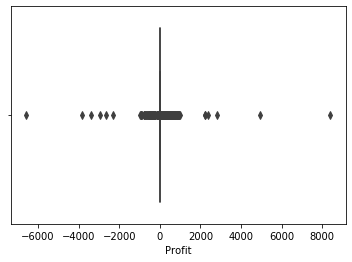

In [18]:
sns.boxplot(df_median.Profit)

In [19]:
df_mode_sale=sales_data.fillna(sales_data['Sales'].mode()[0])

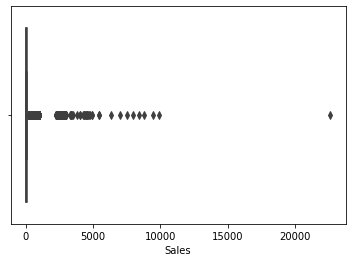

In [20]:
sns.boxplot(df_mode_sale.Sales)

In [21]:
df_mode_quantity=sales_data.fillna(sales_data['Quantity'].mode()[0])

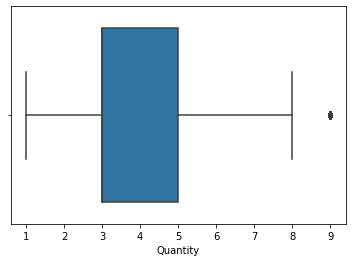

In [22]:
sns.boxplot(df_mode_quantity.Quantity)

In [23]:
df_mode_discounts=sales_data.fillna(sales_data['Discount'].mode()[0])

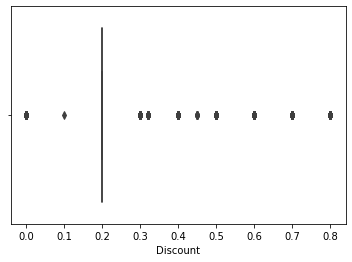

In [24]:
sns.boxplot(df_mode_discounts.Discount)

In [25]:
df_mode_profit=sales_data.fillna(sales_data['Profit'].mode()[0])

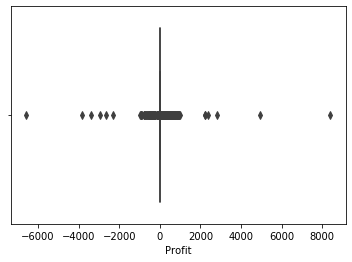

In [26]:
sns.boxplot(df_mode_profit.Profit)

Feature selection using Pearson correlation

In [27]:
pearsoncorr = df_mean.corr(method='pearson')

In [28]:
pearsoncorr

,Postal Code,Sales,Quantity,Discount,Profit,Available
Postal Code,1.000000,-0.011187,0.015002,-0.006661,-0.014008,-0.005918
Sales,-0.011187,1.000000,0.116990,-0.029651,0.218920,-0.009675
Quantity,0.015002,0.116990,1.000000,0.030199,0.031916,0.001102
Discount,-0.006661,-0.029651,0.030199,1.000000,-0.122914,-0.002982
Profit,-0.014008,0.218920,0.031916,-0.122914,1.000000,0.019532
Available,-0.005918,-0.009675,0.001102,-0.002982,0.019532,1.000000


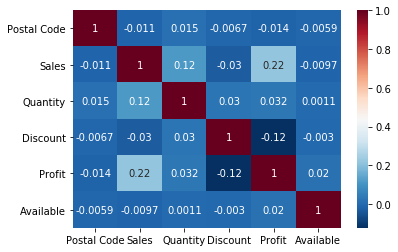

In [29]:
sns.heatmap(pearsoncorr, 
            xticklabels=pearsoncorr.columns,
            yticklabels=pearsoncorr.columns,
            cmap='RdBu_r',
            annot=True,)

The predction of the available stock using the KNN classification

In [30]:
X = df_mean[['Sales', 'Quantity', 'Discount','Profit']]
X.head()

,Sales,Quantity,Discount,Profit
0,26.9600,2.0,0.301981,4.936
1,73.9400,3.0,0.301981,29.582
2,4.6200,2.0,0.301981,6.874
3,957.5775,5.0,0.450000,-383.300
4,22.3680,2.0,0.200000,2.564


In [31]:
y = df_mean['Available']
y.head()

0    True
1    True
2    True
3    True
4    True
Name: Available, dtype: bool

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((6995, 4), (6995,), (2999, 4), (2999,))

In [33]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=10)
knn_model.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [34]:
knn_model.score(X_test,y_test)

0.9223074358119373

In [35]:
y_pred= knn_model.predict(X_test)
y_pred

array([ True,  True,  True, ...,  True,  True,  True])